In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Loading Data into the Dataframe

In [2]:
model=pd.read_csv('train.csv')

In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
model.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
model.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
model=pd.DataFrame().assign(Price=model['price'], Area=model['area'], Bedrooms=model['bedrooms'], bathrooms=model['bathrooms'])

In [7]:
print(model.isnull().sum())

Price        0
Area         0
Bedrooms     0
bathrooms    0
dtype: int64


In [9]:
x=model.drop(columns='Price')
y=model['Price']

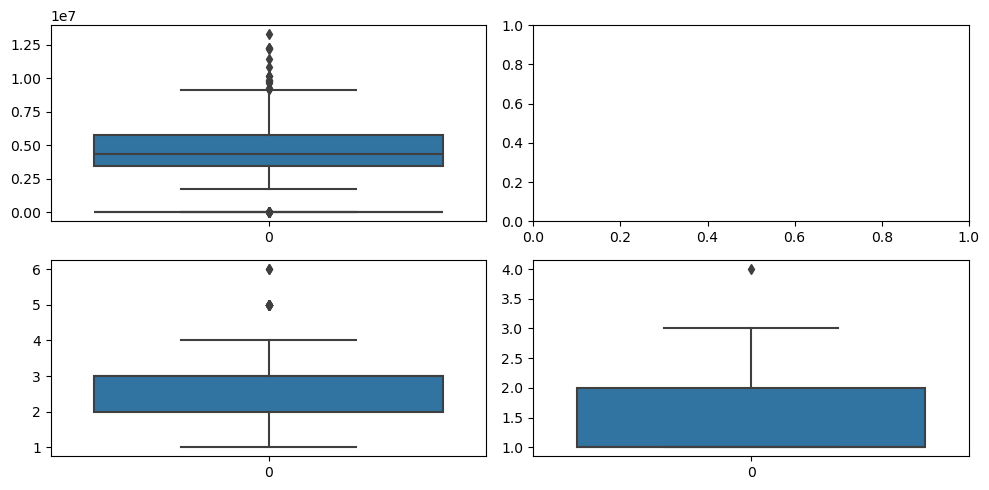

In [18]:
#Outlier Analysis
fig,axs=plt.subplots(2,2,figsize=(10,5))
plt1=sns.boxplot(model['Price'],ax=axs[0,0])
plt2=sns.boxplot(model['Area'],ax=axs[0,0])
plt1=sns.boxplot(model['Bedrooms'],ax=axs[1,0])
plpt2=sns.boxplot(model['bathrooms'],ax=axs[1,1])
plt.tight_layout()
plt.show()

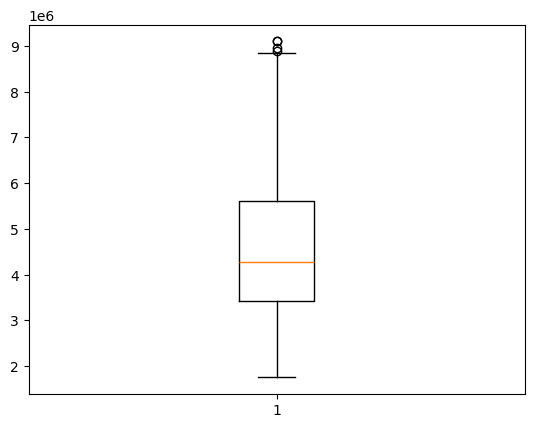

In [26]:
plt.boxplot(model.Price)
Q1=model.Price.quantile(0.25)
Q3=model.Price.quantile(0.75)
IQR=Q3-Q1
model=model[(model.Price>= Q1 - 1.5*IQR) & (model.Price<=Q3 + 1.5*IQR)]

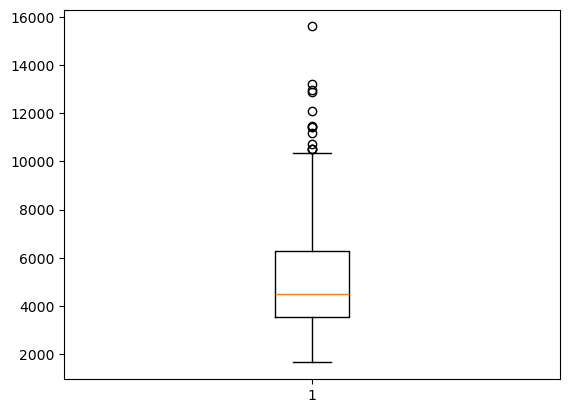

In [32]:
plt.boxplot(model.Area)
Q1=model.Area.quantile(0.25)
Q3=model.Area.quantile(0.75)
IQR=Q3-Q1
model=model[(model.Area >=Q1 - 1.5*IQR) & (model.Area <= Q3 + 1.5*IQR)]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
c =lr.intercept_
print("Intercepts:",c)

Intercepts: -626271.7190235732


In [46]:
m=lr.coef_
print("Coefficients:",m)

Coefficients: [4.16068170e+02 5.07856439e+05 1.39752856e+06]


#Predicting

In [47]:
y_pred_train=lr.predict(x_train)

#Visualization

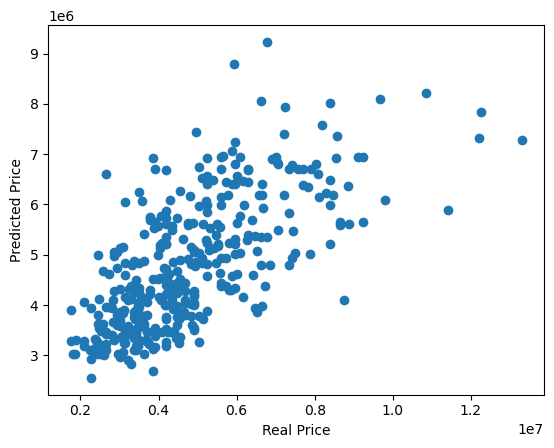

In [48]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.show()


In [50]:
print(r2_score(y_train,y_pred_train))

0.47275303230470844
